In [2]:
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

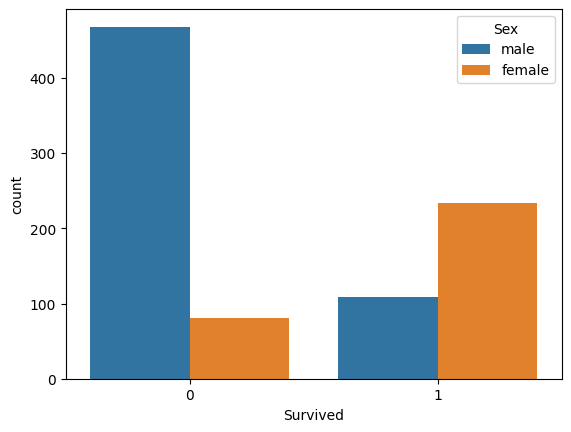

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=data, hue="Sex")

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

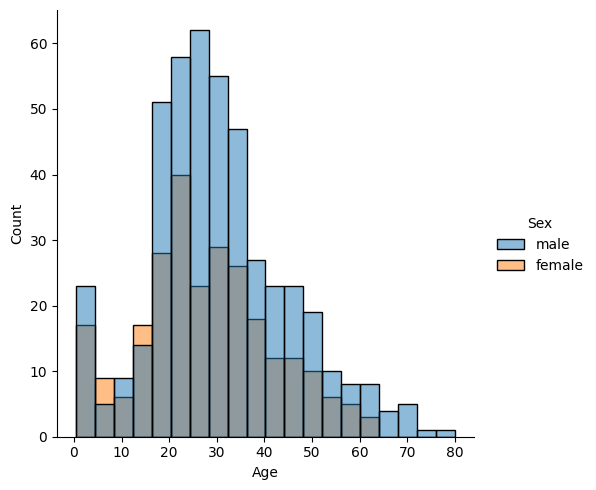

In [6]:
sb.displot(x="Age", data=data, hue="Sex")

In [7]:
data["Age"].mean()

29.69911764705882

In [8]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data = data.drop(["Cabin"] , axis=1)


In [11]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data = data.dropna()

In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data = data.drop(["Name","Ticket","PassengerId"], axis=1)

In [15]:
dummies_sex = pd.get_dummies(data["Sex"] , drop_first=True)


In [16]:
data = data.join(dummies_sex)

In [17]:
data = data.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

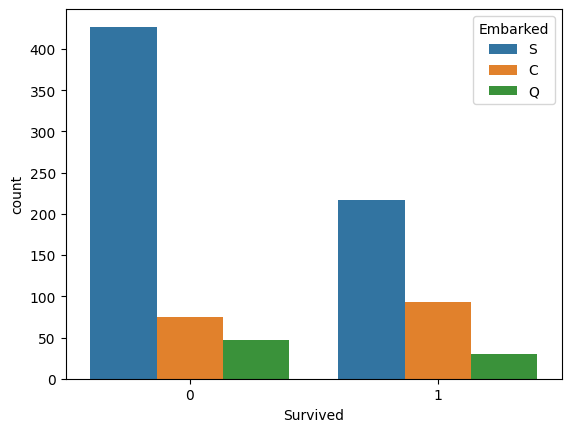

In [18]:
sb.countplot(x="Survived" , data=data , hue="Embarked")

In [19]:
dummies_embarked = pd.get_dummies(data["Embarked"],drop_first=True)
data = data.join(dummies_embarked)
data = data.drop(["Embarked"],axis=1)


<Axes: >

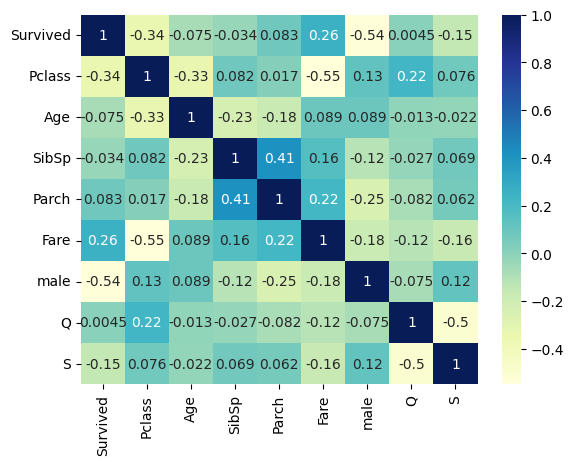

In [20]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [21]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


<Axes: xlabel='Survived', ylabel='count'>

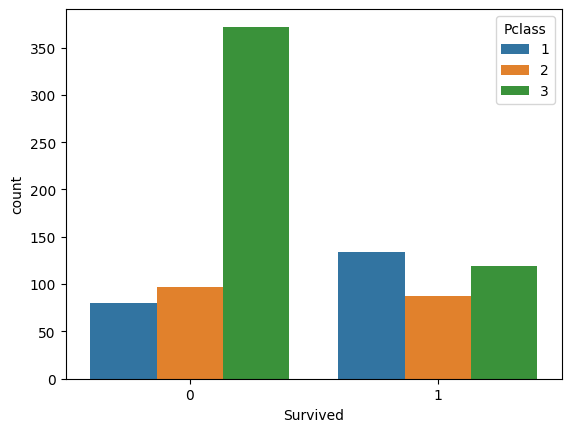

In [22]:
sb.countplot(x="Survived",data=data,hue="Pclass")

In [23]:
X = data.drop(["Survived"], axis=1)
Y = data["Survived"]

In [24]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=.2)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)#max_iter = cahnge the avlue of the max interres:)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [26]:

predict = model.predict(x_test)


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.8089887640449438

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       114
           1       0.75      0.70      0.73        64

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test , predict)

array([[99, 15],
       [19, 45]])

In [37]:
pd.DataFrame(confusion_matrix(y_test,predict), columns=["pred: no", "pred: yes"],index=["real: no","real:yes"])

,pred: no,pred: yes
real: no,99,15
real:yes,19,45


In [38]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [57]:
new_person = [1,20,2,0,1000,1,0,0]

In [58]:
predict = model.predict([new_person])
if predict[0] == 1:
  print("survived")
else:
  print("not survived")

survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
